<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Malm24/blob/main/Semana_8_Data_Analysis_with_Python_(IBM)_A01113135%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Semana 8: Data Analysis with Python (IBM)
Marco Antonio López Millán A01113135
Ciencia y analítica de datos (Gpo 10)
07/11/2022**

Evaluación del modelo nos permite identificar como se comporta nuestro modelo en el mundo real.

Separación de la data:
Trainning 
Testing

Separar los datos aleatoriamente en train y test > train_test_split(x_data, y_data, test_size = 0.3, random_state=0)


x_data - variables independiente
y_data - variable dependiente (objetivo)
tes_size - proporción de la data para test

Cross Validation 

Data set es dividio en "k" grupos del mismo tamaño.

Supongamos k=4

1 grupo es utilizado como test set
3 grupos grupos para trainning

Funcion validacion cruzada > cross_val_score()

cross_val_score (lr,x_data, y_data, cv = 3)

lr - tipo de modelo
cv - numero de particiones 

Undefitting y Overfitting

Underfitting es un modelo que demasiado simple para modelar la data
Overfitting es el modelo es tan flexible que se adapta al ruido en lugar del modelo


Ridge Regression

Nos permite prevenir el sobreentrenamineto

Ridge regression controla la magnitud de los coeficientes introduciendo el valor alpha

A mayor valor de Alpha las maginitudes disimuyen


Grid Search

Toma el modelo que quieres entrenar y utiliza diferentes valores para los hiperparametros. Despues, procede a calcular el error por medio de MSE o R2 para poder seleccionar los valores que nos entreguen un mejor resultado.



In [87]:
import pandas as pd #importando librerias 
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

In [17]:
file = "/content/module_5_auto.csv"

In [18]:
df = pd.read_csv(file)

In [19]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [20]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [21]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [22]:
x_data=df.drop('price',axis=1) #definiendo data en x

In [23]:
y_data = df['price'] #definiendo data en y

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1) #realizando particion de datos


print("tamaño muestra test :", x_test.shape[0])
print("tamaño mmue:",x_train.shape[0])

tamaño muestra test : 21
tamaño mmue: 180


In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0) #realizando particion de datos


print("tamaño muestra test :", x_test1.shape[0])
print("tamaño mmue:",x_train1.shape[0])

tamaño muestra test : 81
tamaño mmue: 120


In [26]:
lre=LinearRegression() #definiendo lre

In [27]:
lre.fit(x_train[['horsepower']], y_train) #entrenando el modelo

LinearRegression()

In [28]:
lre.score(x_test[['horsepower']], y_test) #midiendo r2 para test

0.36358755750788263

In [29]:
lre.score(x_train[['horsepower']], y_train) #midiendo r2 para entrenamiento

0.6619724197515104

In [30]:
lre.fit(x_train1[['horsepower']], y_train1) #entrenando el modelo

LinearRegression()

In [33]:
lre.score(x_test1[['horsepower']],y_test1) #r2 para test

0.7534706024278713

In [35]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) #definiendo Cross validation con 4 fold

In [36]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [37]:
print("La media de las particiones es:", Rcross.mean(), "La desviación estandar de las particiones es:" , Rcross.std())

La media de las particiones es: 0.522009915042119 La desviación estandar de las particiones es: 0.291183944475603


In [39]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2) #definiendo Cross validation con 2 fold

In [43]:
Rc.mean() #calculando el promedio


0.5166761697127429

In [45]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4) #realizando prediccion con cros validation 4 fold
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [46]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train) #creando regresion lineal multiple con 4 variables

LinearRegression()

In [47]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #realizando prediccion 
yhat_train[0:5] 

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [51]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


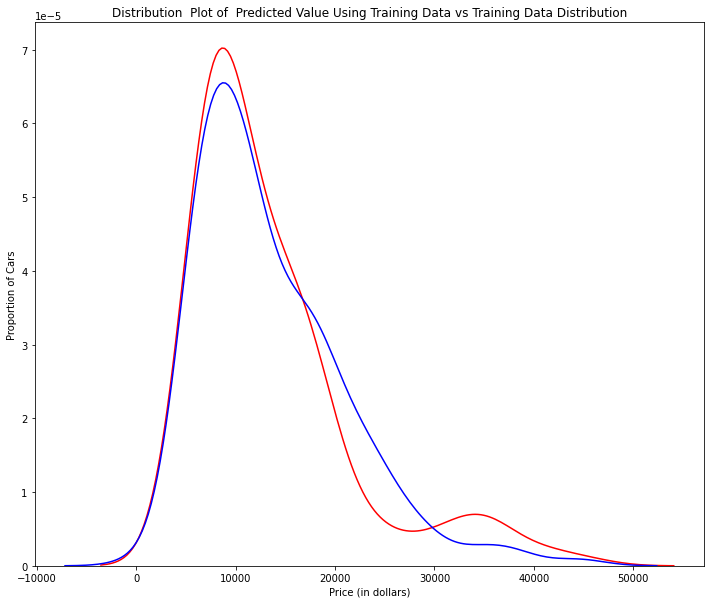

In [49]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


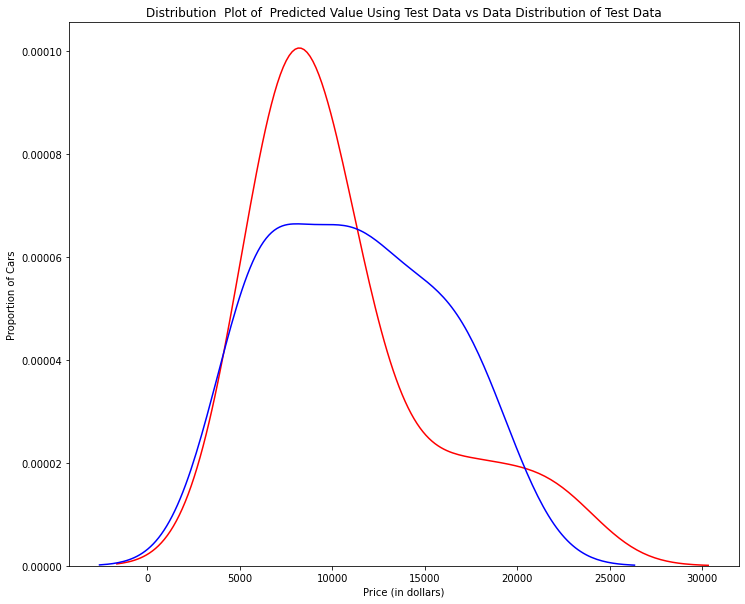

In [52]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0) #realizando la particion de los datos

In [55]:
pr = PolynomialFeatures(degree=5) 
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [56]:
poly = LinearRegression() #creando modelo de regresion poly
poly.fit(x_train_pr, y_train)

LinearRegression()

In [57]:
yhat = poly.predict(x_test_pr) #realizando predicciones con el modelo
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [58]:
print("predicciones:", yhat[0:4])
print("valores reales:", y_test[0:4].values)

predicciones: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
valores reales: [ 6295. 10698. 13860. 13499.]


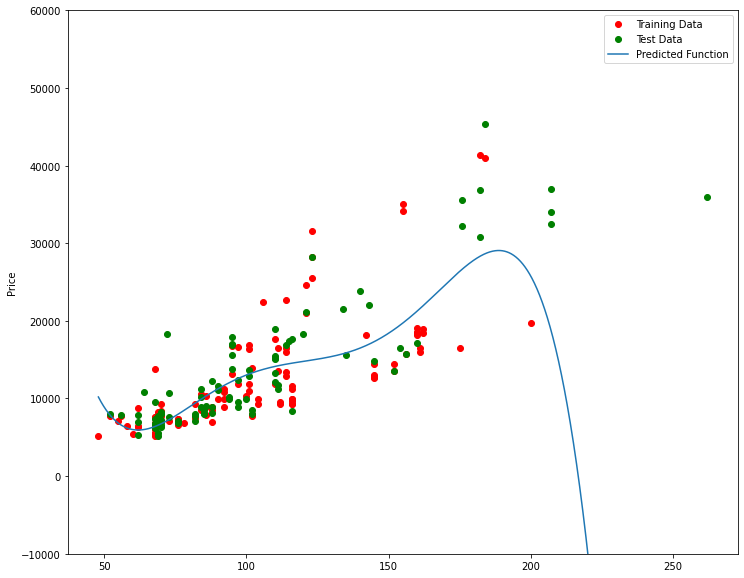

In [59]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr) #graficando los datos

In [60]:
poly.score(x_train_pr, y_train) #consultando r2 de entrenamiento

0.556771690212023

In [61]:
poly.score(x_test_pr, y_test) #consultando r2 de test

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

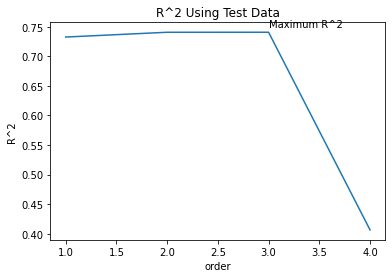

In [62]:
Rsqu_test = [] #reailzando curvas de entrenamiento

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [63]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [64]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [66]:
pr1 = PolynomialFeatures(degree=2) #modelo polinomial de grado 2

In [67]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) 

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [68]:
x_train_pr1.shape

(110, 15)

In [73]:
poly1=LinearRegression().fit(x_train_pr1,y_train) # definiendo modelo de regresion 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


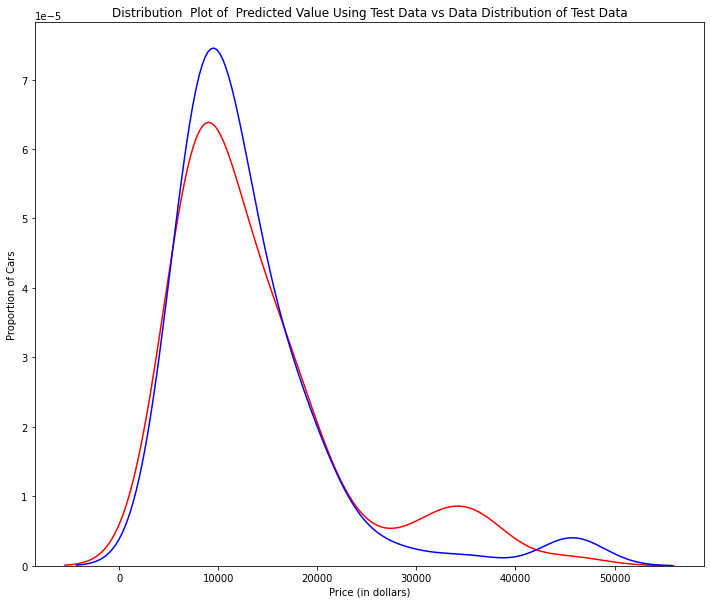

In [75]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [76]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [79]:
RigeModel=Ridge(alpha=1) #creando objeto rigemodel

In [80]:
RigeModel.fit(x_train_pr, y_train) #entrenando el modelo

Ridge(alpha=1)

In [81]:
yhat = RigeModel.predict(x_test_pr)

In [82]:
print('prediccion:', yhat[0:4])
print('test:', y_test[0:4].values)

prediccion: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test: [ 6295. 10698. 13860. 13499.]


In [84]:

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 202.28it/s, Test Score=0.564, Train Score=0.859]


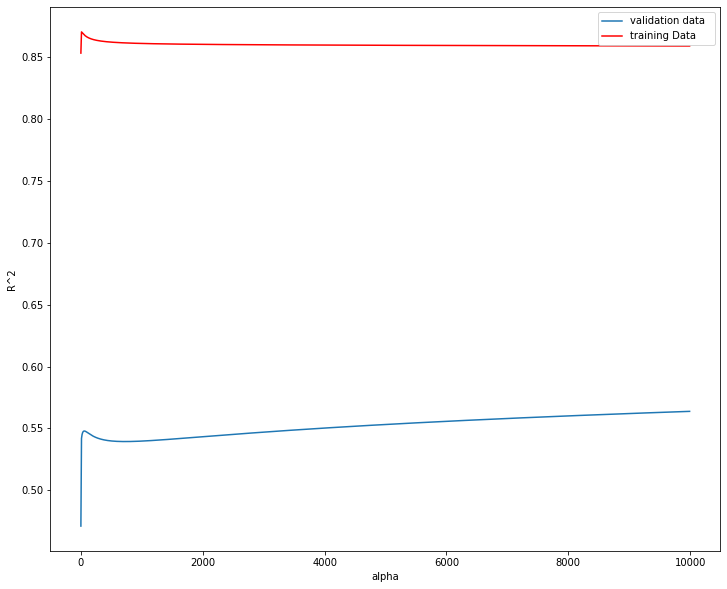

In [85]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [86]:
RigeModel = Ridge(alpha=10) # creando modelo con alpha 10
RigeModel.fit(x_train_pr, y_train) #entrenando modelo
RigeModel.score(x_test_pr, y_test) #r2 del test

0.5418576440206702

In [88]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1 #definendo parametros

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [89]:
RR=Ridge()
RR #crean regresion ridge

Ridge()

In [90]:
Grid1 = GridSearchCV(RR, parameters1,cv=4) #creando grid seach

In [91]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data) #fitting el modelo

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [92]:
BestRR=Grid1.best_estimator_ #obteniendo el mejor parametro
BestRR

Ridge(alpha=10000)

In [93]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test) #obteniendo promedio de R2

0.8411649831036151

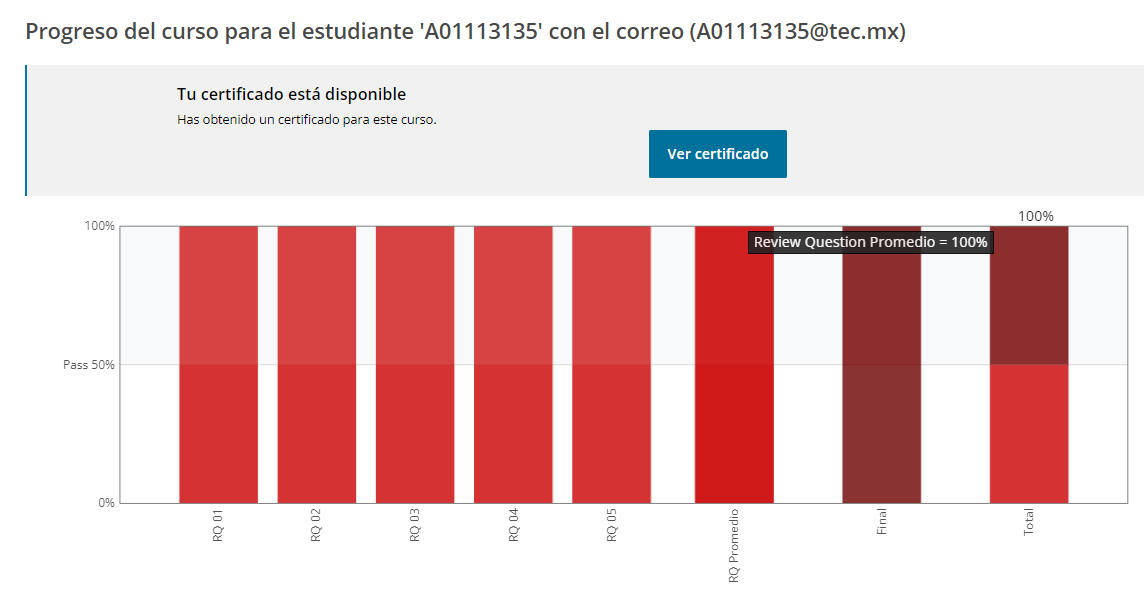

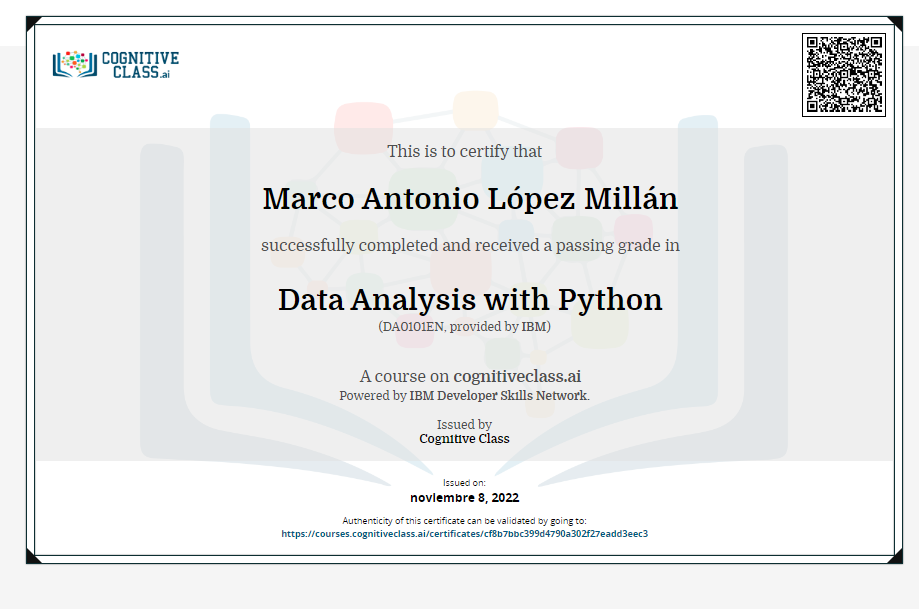

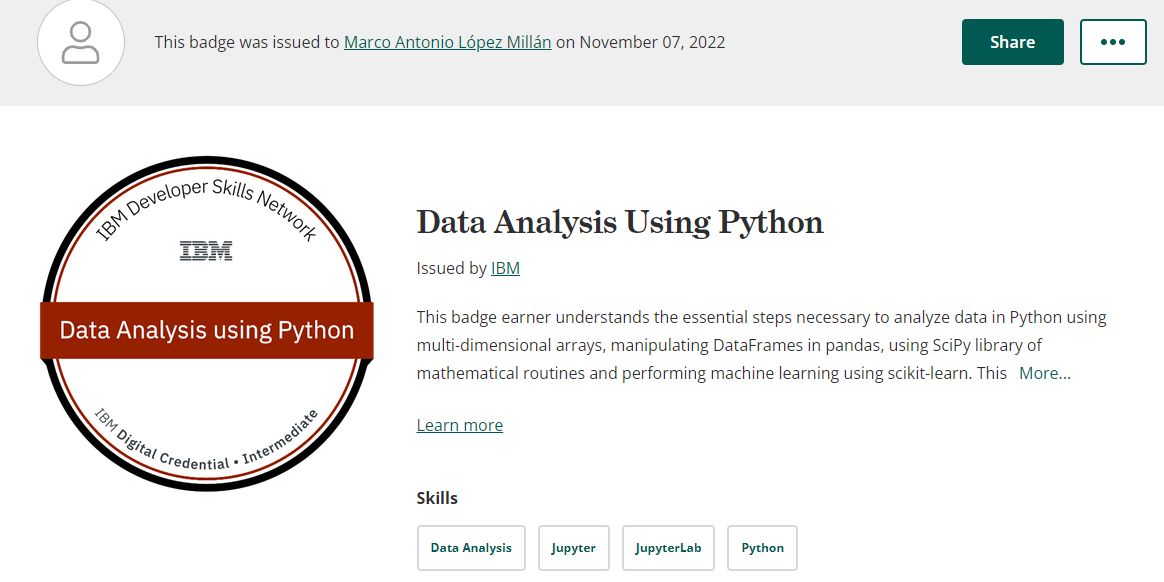